# Contexto histórico económico-político

El crecimiento del PIB a lo largo de estos treinta años se ha visto muy influenciado por las dos crisis, la primera financiera (2008) y la segunda, en el 2020, por la pandemia de la COVID-19. Sin contar esos reveses, la economía estadounidense ha tenido siempre etapas de crecimiento del PIB. Tras la crisis del 2008, y llegar a un crecimiento negativo cercano al 3, se recuperó los niveles de crecimiento anterior en el 2011.  Tras la reciente pandemia del COVID y todas las restricciones en los movimientos y libertades de la población mundial, en el 2022, la economía estadounidense, recuperó y superó los niveles de crecimiento del PIB con respecto a los años anteriores.
El PIB per cápita ha aumentado inveteradamente en los últimos años, siendo uno de los países con mayor PIB per cápita del mundo, muy por delante de China, la reciente nueva candidata a dominar el mundo. Este PIB per cápita era de 23.888 dólares americanos a los inicios del 1990 en cambio, en el 2022, alcanzan los 76.369 dólares americanos. No obstante, ha habido un decremento en el crecimiento de la población, medida que afecta también a este aumento del PIB per cápita. A pesar de todo, esto no explica el aumento de mensurado del PIBpc. 
Si ponemos el foco en la IED, vemos como se ha mantenido constante a lo largo de la las últimas décadas, EE.UU. nunca ha tenido una grandísima inversión extranjera exterior con respecto a su PIB. Por otro lado, el desempleo ha sido históricamente uno de los puntos fuertes de Estados Unidos, por ser un país que generalmente ha mantenido unas tasas de desempleo bajas. El desempleo muestra también las fluctuaciones propias de todas las economías en las últimas décadas, un aumento del desempleo en las dos crisis recientes del 2008 y del 2020, luego de una estabilización de su economía y posterior reducción de los índices. Sigue aun a día de hoy siendo una economía con una reducidísima tasa de desempleo. 

Estados Unidos presenta también un aumento en los aranceles y barreras como porcentaje de la recaudación total en impuestos. Muestra quizás de su creciente debilidad frente a las nuevas economías asiática, especialmente la economía china con la que han destacado sus recientes guerras comerciales y bloqueos en sectores clave. Esto puede ser un problema tal y como indica (George Alessandria et al.), puesto que los cambios en los aranceles y barreras, son una fuente más importante que otros shocks del aumento del déficit comercial. 

El ahorro doméstico de US se ha visto reducido en los últimos años, tal y como indica (Catherine L. Mann), esto puede ser debido a un aumento del consumo doméstico, gracias a las acciones y al patrimonio inmobiliario. Es decir, ha habido más gasto que ahorro en las familias. Por otro lado, esta reducción en el ahorro es también debido a un aumento del gasto deficitario gubernamental debido a sendas políticas de recortes en el ingreso a las personas.

 Además, ha aumentado el déficit financiero internacional. En la actualidad, el ahorro como porcentaje del PIB se encuentra en un 17,13 por ciento (2020), unos tres puntos menos que a los inicios de los años noventa.  La deuda como porcentaje del PIB también se ha visto engrosada, de un 40 por ciento del PIB en el 1990 a más del 115 por ciento en el 2022. Datos que no hacen más que ahondar en el profundo problema en el que se encuentra EEUU.



# Exportaciones
Estados Unidos ha sufrido un cambio profundo en su balanza comercial de bienes en los últimos 30 años. En el 1991, el peso de sectores como el de la maquinaria eléctrica o transporte, representaban un 35 por ciento y un 13 por ciento en sus exportaciones hacia el exterior. Sectores como el de los químicos, productos vegetales o metales y plásticos tenían un significativo porcentaje en su balanza. El sector textil es otro de los sectores en los que se mostraba como una gran potencia económica.  

En el reciente 2021, vemos un cambio en la composición de las exportaciones de bienes ya que, por un lado, la maquinaria y el sector transporte, sectores clave tecnológicamente hablando, tienen menor fuerza industrial en sus exportaciones en la balanza comercial (22,57 por ciento y 10,18 por ciento respectivamente). Además, junto a este decremento de su exportación en estos sectores en los que históricamente ha sido una potencia mundial, vemos el aumento de la exportación de minerales, el crecimiento de la importancia de los productos químicos y un encogimiento del sector textil.
 
El comercio total ha aumentado como porcentaje del PIB en estos últimos 30 años. De un casi 20 por ciento en el 1990 a un potente 27 por ciento del PIB en el 2022. Si bien es cierto que el comercio exterior es cada vez más importante para el PIB de EE.UU. Este aumento de la relevancia del comercio en su PIB no se puede explicar sin el aumento del peso del sector servicios total (EX+IM) en la balanza de bienes y servicios, puesto que en el 1990 representaba el 4,45 por ciento del PIB y en el 2022, el 6,38 por ciento. 

Como podemos observar en las gráficas, el sector servicios se ha hecho con el dominio absoluto de sus exportaciones brutas hacia el exterior. La expansión del sector servicios ha venido de la mano de una expansión del sector financiero fundamentalmente. De hecho, entre los cinco mayores servicios exportados hacia el exterior en el 2021 se encuentran, por orden:  los servicios financieros, los misceláneos, los viajes de turistas, los royalties y licencias y las franquicias y derechos similares. 


# Importaciones
En las importaciones vemos como en el 1995 la maquinaria dominaba el mercado con un 32 por ciento del volumen total. Además, el sector transporte, según la denominación HS96, también estaba muy presente en su composición de la balanza. Destaca también la grandísima cantidad de minerales, textiles y metales. Con el tiempo, estos porcentajes se han mantenido más o menos constantes. La maquinaria sigue siendo el principal sector en el que importa Estados Unidos, en segundo lugar, los transportes que sí que ha sufrido un mayor cambio puesto que en el 2021 representaban un 11,43 por ciento del total importado. El sector de los productos químicos ha visto incrementada su importancia en las importaciones ya que alcanza el 10,15 por ciento. Los productos minerales y metales, que también han aumentado con respecto a hace treinta años.

El hecho de que en sectores tan importantes como el de la maquinaria y transporte US presente estos datos, pone en relieve lo que ya muchos vienen diciendo y anunciando. Estados Unidos está mirando hacia una economía más dirigida hacia el sector servicios y no tanto a la tecnología y transporte. Unido a esto, posee un déficit comercial que ha ido en aumento en los últimos 30 años, algo difícil de explicar en una economía tan potente como la estadounidense. La balanza comercial está sufriendo un revés puesto que el déficit comercial es aún mayor que en el 1990. En ese año era del -1,3 por ciento del PIB, en el 2022, -3,8 por ciento (Banco Mundial).  Teniendo en cuenta el surgimiento y consolidación de las economías asiáticas en términos de producción de productos de alto valor añadido, el futuro de EEUU, si todo sigue así parece que es el de una economía dirigida a los servicios.  

La contracción de la industria TICs tanto por el lado de la oferta como de la demanda es un síntoma más del cambio de rumbo de EE.UU. En este sentido, tal y como indica (Festus Fatai Adedoyin et al.), la entrada de inversión extranjera directa en EEUU está positivamente relacionada con el crecimiento económico cuando entran en la ecuación las tecnologías Tics.  En su estudio, muestran una relación negativa entre el IED y el crecimiento de PIB de US, cuando el aumento del IED no se hace en relación al sector tic, llegando a la conclusión de que a EEUU le falta inversión en estos sectores puesto que el IED es negativo. 


# ¿Hacia dónde se han ido las exportaciones?
A los inicios de 1995, Asia era el continente hacia donde más se dirigían sus exportaciones hacia el exterior. Un 35% de las exportaciones para ser más exactos. Norte américa y Europa, estaban en el tercer lugar con un 30,15% y 24,64% respectivamente. Con el tiempo, Norte América ha ido ganando peso en su balanza comercial, hasta situarse la región en la que más exporta Estados Unidos. Cabe destacar que el porcentaje de regiones como el pacífico o África, no han sufrido grandes cambios en sus exportaciones hacia los mismos.

Por otro lado, Sudamérica sí que ha experimentado un cambio hacia su economía en el sentido que sí que ha crecido su comercio hacia la misma. Tras la crisis del 2008, se posicionó en un consistente 7% del total exportado por EEUU. Sin embargo, este crecimiento se vio frenado a lo largo del tiempo. Tras la reciente pandemia, parece que estos datos vuelven a dar la esperanza de un aumento y crecimiento del valor del mercado sudamericano en las exportaciones estadounidenses. 

Los países a los que más exportaba EE.UU. en el 1995 eran: Canadá, Japón, México, UK y Corea del Sur, en este orden. En la actualidad, han cambiado los patrones comerciales. El surgimiento de la economía China y su consolidación como la mayor potencia mundial, ha hecho que haya ido ganando posiciones en la Balanza Comercial estadounidense. En el 2021, los cinco países a los que más exportaba EE.UU. son: Canadá, México, China, Japón y Corea del Sur. Como vemos, a pesar de la mayor concentración de países asiáticos en sus exportaciones, ha habido un aumento de la proporción de Norteamérica en su BC. 

En las importaciones, existe un claro dominio del continente asiático. Casi la mitad de las importaciones de EEUU provienen de este continente. Además, este dominio asiático en su balanza comercial, se ha hecho mayor conforme ha ido pasando el tiempo. En el 1995, las importaciones de norte américa hacia US, representaban tan solo el 70% de las importaciones desde el continente asiático. En el reciente 2021, las importaciones desde norte américa, suponen el 60% de las importaciones desde Asia.

 El valor de la región de Oceanía es anecdótico, no tiene prácticamente importaciones desde estos países que se han desarrollado bastante en estos últimos años. Tan solo significa el 2% del comercio total con Asia tanto en el 1995 como en el 2021. La importancia se ha mantenido ciertamente constante a lo largo del tiempo. El continente africano ha experimentado una reducción en la importancia relativa con respecto a las importaciones al continente. De representar un 2% del comercio internacional con Estados Unidos a significar un 1.29%. 

En el 1995, de los cinco países en los que más exportaciones recibía Estados Unidos 2 eran asiáticos, Japón y China. Canadá se encontraba en el primer lugar, seguida de Japón, México, Alemania y China. En el 2021, siguen siendo estos países desde donde más importa EE. UU, pero cambiados de orden, teniendo en primer lugar a China, luego México y, por último, Japón. Si contamos, además, con la evolución del continente asiático en términos tecnológicos, la contracción de la economía estadounidense en estos sectores, y la reducción de sus exportaciones hacia esos continentes, se nos presenta un futuro para Norte América curioso.

El déficit de la Balanza comercial estadounidense como ya hemos dicho anteriormente ha ido aumentando en los últimos tiempos. Si nos fijamos en los países con los que más déficit presenta EE.UU. en el 2021, la tasa de variación de la diferencia entre exportaciones e importaciones entre el periodo que va desde el 1995 y el 2021, la diferencia entre China y EEUU ha aumentado en un 1490 por ciento. Seguido de ella está Tailandia, México e Italia (-626.11%, -527.39% y -440.20%, respectivamente). Cabe destacar que entre los diez países con los que más déficit presenta en el 2021, al menos cinco, provienen del continente asiático. 

A nivel regional, la tasa de variación de la diferencia en la Balanza comercial entre 1995 y 2021 entre Asia y EEUU ha aumentado en un 551 por ciento. El dato más sorprendente negativamente es el aumento del déficit en casi unos cuatro mil porcientos con Europa. Con Norteamérica y África también ha sufrido un incremento del déficit del 253 por ciento y el 105 por ciento, respectivamente. Sudamérica es la que mayor cambio positivo presenta puesto que no solo no tiene déficit, sino que la diferencia ha aumentado positivamente en un 267 por ciento con respecto al 1995.


# PIB desagregado de EEUU
Tal y como podemos ver en la gráfica del PIB desagregado, el comercio exterior neto de bienes y servicios es negativo desde aproximadamente 1980. Este déficit de la balanza se ha engrosado con el paso del tiempo, como hemos demostrado en los análisis previos. Las exportaciones netas de bienes y servicios han lastrado la economía estadounidense en los últimos 40 años. En algunos años, ha llegado a significar un 5% negativamente del PIB. En los años recientes, representa valores cercanos al -3%. Si ahondamos en un análisis desagregado de los componentes del PIB vemos como el consumo personal privado, la inversión privada o el gasto del gobierno junto con las inversiones tienen una relevancia mayor y positiva que las exportaciones netas de bienes y servicios, que está mermando el PIB de manera preocupante. El consumo personal privado ha significado siempre aproximadamente entre el 65-68 por ciento del PIB de los estados unidos, es su principal motor de la economía. Seguido de la inversión privada bruta y del gasto público nacional.

En el apartado del consumo personal lo que más relevancia ha tenido a lo largo del tiempo ha sido el gasto en la vivienda y servicios públicos, seguido de cuidados y salud. En este sentido, el consumo en salud ha sido lo que más aumentado con respecto a 1960, seguido de la vivienda y del consumo de otros bienes no duraderos. De hecho, el consumo en salud aumenta proporcionalmente más que los otros gastos de los hogares. Además, dentro del consumo personal, los que más variación han presentado con respecto al 2022, son los gastos en alimentos y vivienda (10,52%), servicios de recreación (9.38%) y cuidados de la salud (8,03%).  

 Por otro lado, en la inversión privada bruta nacional, destaca el crecimiento del consumo no residencial, el cual está formado por estructuras, equipos y productos de propiedad intelectual.  Dentro de este grupo hay que destacar el crecimiento de los productos de propiedad intelectual, seguido de ellos los equipos y después, las estructuras. En los productos de propiedad intelectual se encuentran los softwares, la investigación y el desarrollo y, por último, el entretenimiento. En los equipos, destacan los equipos de procesamiento de la información, otros equipos y los equipos industriales, en ese orden. Es importante destacar el hecho de que la propiedad intelectual y equipos se hayan convertido en pilares fundamentales de la economía estadounidense y como de a futuro seguirá siendo una parte fundamental de su economía. Por último, en el gasto de consumo del gobierno e inversiones, dentro de el apartado del gasto del gobierno federal, existe desde siempre, un mayor gasto en defensa que en no defensa. Además, el gasto estatal es mayor al gasto federal. Dentro del gasto del gobierno estatal destaca el mayor aumento del gasto en consumo y no tanto en inversión bruta. 




# Conclusiones
La balanza comercial y en especial el comercio internacional de productos pertenecientes a las tecnológicas, son lo que conforman las industrias 4.0. Estas industrias son una fuente de ingresos debido a la alta importancia en el mercado internacional. Los bienes intermedios y finales tecnológicamente avanzados son utilizados hoy en día en innumerables procesos productivos. Estados Unidos tiene un problema por el lado de la demanda, su industria tecnológica no es capaz de suplir la demanda interna ni la externa. Las exportaciones netas con las principales potencias actuales asiáticas son negativas y no parece que vaya a ser algo que cambie. Los acuerdos preferenciales con las potencias del norte de américa sí que están ayudando a una mayor integración de sus mercados, pero el dominio de las economías asiáticas es tal que, entre las principales importadoras hacia Estados Unidos, por lo menos 5 de ellas son asiáticas. 

El auge y consolidación de las economías asiáticas y su posicionamiento como principales industrias tecnológicas pone en riesgo la hegemonía estadounidense. Esta aparición del continente asiático y de su creciente mercado interior, ha conseguido crear un espacio de industrialización vertical que las ha hecho crecer económicamente. Países como Corea del sur, singapur o Taiwán, se encuentran en las primeras posiciones como principales exportadores de bienes tecnológicos. Además, la aparición de China como principal industria de bienes finales gracias a su fuerza laboral, su impulso a las industrias tecnológicas y su acceso a una gran cantidad de materias primas en su territorio, la convierte en la nueva gran potencia mundial.

El crecimiento de Estados Unidos por el lado del PIB está fuertemente fundamentado en el consumo de las familias de vivienda y de seguros para la salud. El crecimiento en el sector inmobiliario puede ser un problema puesto que como ya vimos en la creciente crisis del 2008, es un mercado que si crea una burbuja arrastra a toda la economía al colapso. Por otro lado, el consumo privado se dirige hacia los bienes de carácter tecnológico-informático, la inversión en I+D y en software dominan esta cuenta, las tecnológicas de estados unidos están siendo un mercado atractivo para la inversión por parte de los consumidores. Un mercado interno que está siendo capaz de ver donde está el presente y el futuro desarrollo de la economía mundial.  No todas las noticias son malas, Estados Unidos debe de ser capaz de revertir su situación con para el exterior potenciando su industria de bienes, no tanto la de servicios, para volver a tener una economía competitiva en el exterior y no tener ese balance negativo en las exportaciones netas exteriores. 


## Librerías

In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
export= pd.read_csv("C:\\Users\\xabil\\OneDrive\\Escritorio\\eeuu\\export.csv")
export.columns
imports = pd.read_csv("C:\\Users\\xabil\\OneDrive\\Escritorio\\eeuu\\import.csv")


## 1. BC

#### Gráfica por sectores

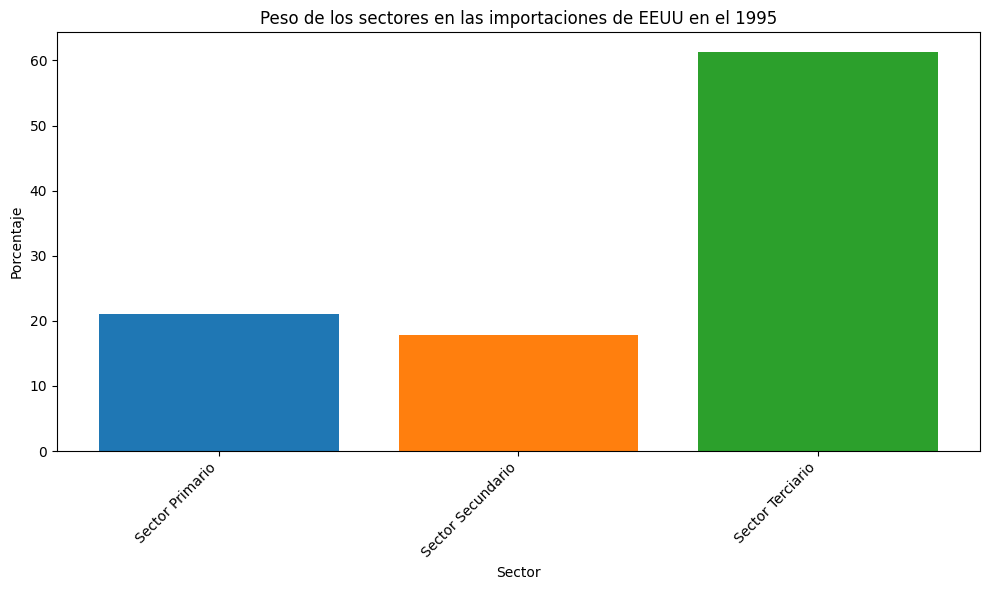

In [186]:
### Exportaciones#####

def limpio(df):
    columstodrop=['HS2', 'HS2 ID', 'HS4', 'HS4 ID','Section ID']
    limpio= df.drop(columstodrop, axis=1)
    return limpio
limpio2 = limpio(imports)

#exportaciones=exportaciones.pivot_table(index='ProductCode', columns='Year', values='Exportaciones').reset_index()
#exportaciones.columns.name = None
def calcular_peso_relativo(df):

    pivot_df = df.pivot_table(index='Section', columns='Year', values='Trade Value', aggfunc='sum', fill_value=0)
    total_por_ano = pivot_df.sum(axis=0)
    peso_relativo_df = (pivot_df.div(total_por_ano, axis=1)) * 100
    return peso_relativo_df

exportaciones= calcular_peso_relativo(limpio2)
exportaciones = exportaciones.reset_index()
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
#####################################################################################################################

col=[ 1996,      1997,      1998,      1999,
            2000,      2001,      2002,      2003,      2004,      2005,
            2006,      2007,      2008,      2009,      2010,      2011,
            2012,      2013,      2014,      2015,      2016,      2017,
            2018,      2019,      2020,2021]

pivot =exportaciones.drop(col, axis=1)

############################################################################################
sector_mapping = {
    'Sector Primario': ['Animal Hides', 'Animal Products', 'Animal and Vegetable Bi-Products',
                        'Vegetable Products', 'Mineral Products', 'Metals', 'Precious Metals'],
    'Sector Secundario': ['Chemical Products', 'Foodstuffs', 'Wood Products', 'Stone And Glass',
                          'Textiles', 'Footwear and Headwear'],
    'Sector Terciario': ['Arts and Antiques', 'Instruments', 'Machines', 'Miscellaneous', 'Paper Goods',
                         'Plastics and Rubbers', 'Transportation', 'Weapons']
}

# Crear un diccionario para almacenar las sumas de cada sector
sector_sums = {sector: 0 for sector in sector_mapping}

# Iterar sobre el DataFrame y sumar los valores correspondientes a cada sector
for sector, items in sector_mapping.items():
    for item in items:
        sector_sums[sector] += pivot[pivot['Section'] == item][1995].values[0]

# Convertir el diccionario a DataFrame
sector_df = pd.DataFrame(list(sector_sums.items()), columns=['Sector', '1995'])
sector_df

plt.figure(figsize=(10, 6))
colors = plt.cm.tab10.colors 

plt.bar(sector_df['Sector'], sector_df['1995'], color=colors)
plt.xlabel('Sector')
plt.ylabel('Porcentaje')
plt.title('Peso de los sectores en las importaciones de EEUU en el 1995')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()

plt.show()

#### Gráfica barras por industria.

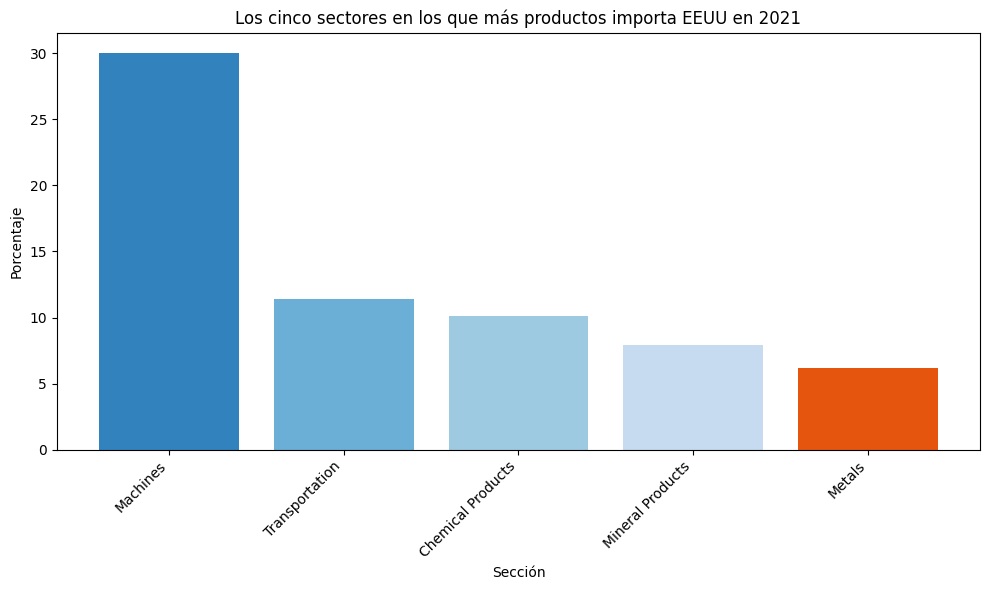

In [187]:
### Exportaciones e importaciones #####

def limpio(df):
    columstodrop=['HS2', 'HS2 ID', 'HS4', 'HS4 ID','Section ID']
    limpio= df.drop(columstodrop, axis=1)
    return limpio
limpio2 = limpio(imports)

#exportaciones=exportaciones.pivot_table(index='ProductCode', columns='Year', values='Exportaciones').reset_index()
#exportaciones.columns.name = None
def calcular_peso_relativo(df):
    pivot_df = df.pivot_table(index='Section', columns='Year', values='Trade Value', aggfunc='sum', fill_value=0)
    total_por_ano = pivot_df.sum(axis=0)
    peso_relativo_df = (pivot_df.div(total_por_ano, axis=1)) * 100
    return peso_relativo_df

exportaciones= calcular_peso_relativo(limpio2)
exportaciones = exportaciones.reset_index()
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
#####################################################################################################################

col=[ 1995,1996,      1997,      1998,      1999,
            2000,      2001,      2002,      2003,      2004,      2005,
            2006,      2007,      2008,      2009,      2010,      2011,
            2012,      2013,      2014,      2015,      2016,      2017,
            2018,      2019,      2020]

pivot =exportaciones.drop(col, axis=1)

best95=pivot.sort_values(by =2021, ascending=False).head()
#########################################################################################################################

plt.figure(figsize=(10, 6))
colors = plt.cm.tab20c.colors  

plt.bar(best95['Section'], best95[2021], color=colors)


plt.xlabel('Sección')
plt.ylabel('Porcentaje')
plt.title('Los cinco sectores en los que más productos importa EEUU en 2021')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()


plt.show()


In [188]:
def limpio(df):
    columstodrop=['HS2 ID', 'HS4 ID','Section ID']
    limpio= df.drop(columstodrop, axis=1)
    limpio2=['Animal Products', 'Vegetable Products',
       'Animal and Vegetable Bi-Products', 'Foodstuffs',
       'Mineral Products', 'Chemical Products', 'Plastics and Rubbers',
       'Animal Hides', 'Wood Products', 'Paper Goods', 'Textiles',
       'Footwear and Headwear', 'Stone And Glass', 'Precious Metals',
       'Metals','Machines', 'Instruments', 'Weapons',
       'Miscellaneous', 'Arts and Antiques']
    limpio2 = limpio[~limpio['Section'].isin(limpio2)]
    clp=['Section']
    limpio2=limpio2.drop(clp,axis=1)
    clp2=['Railway and trams','Aircraft and spacecraft','Ships, boats, & floating structures']
    limpio2 = limpio2[~limpio2['HS2'].isin(clp2)]
    clp=['HS2']
    limpio2 =limpio2.drop(clp,axis=1)
    return limpio2
limpio2 = limpio(export)

#exportaciones=exportaciones.pivot_table(index='ProductCode', columns='Year', values='Exportaciones').reset_index()
#exportaciones.columns.name = None
def calcular_peso_relativo(df):
    pivot_df = df.pivot_table(index='HS4', columns='Year', values='Trade Value', aggfunc='sum', fill_value=0)
    total_por_ano = pivot_df.sum(axis=0)
    peso_relativo_df = (pivot_df.div(total_por_ano, axis=1)) * 100
    return peso_relativo_df
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_rows', None)
l= calcular_peso_relativo(limpio2).reset_index()



#### Industria con el Sector servicios.

In [189]:
lcd = pd.read_csv("C:\\Users\\xabil\\OneDrive\\Escritorio\\eeuu\\Servicios EEUU\\What did United States of America export between 1995 and 2021_.csv")
lcd.head()

,Name,Code,Year,Current Gross Export,Sector
0,"Textiles, garments, footwear and furniture",0 HS92,1995,$26.6B,Textiles
1,"Textiles, garments, footwear and furniture",0 HS92,1996,$27.5B,Textiles
2,"Textiles, garments, footwear and furniture",0 HS92,1997,$31.1B,Textiles
3,"Textiles, garments, footwear and furniture",0 HS92,1998,$32.1B,Textiles
4,"Textiles, garments, footwear and furniture",0 HS92,1999,$29.7B,Textiles


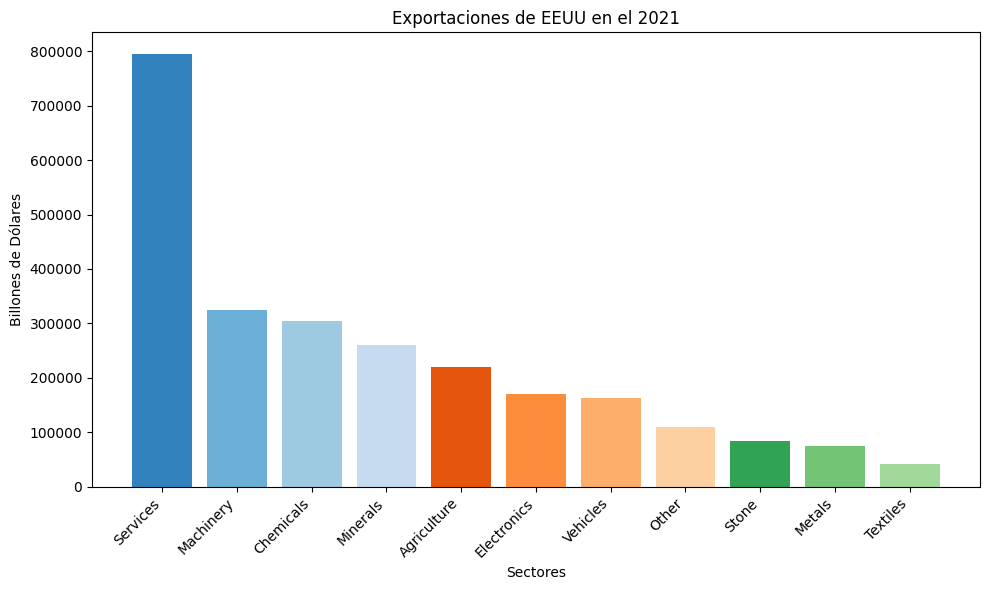

In [190]:
col =['Name','Code' ]
lcd.drop(col, axis=1)
lcd['Year'].unique()
years =[ 1995,1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020]
l = lcd.pivot_table(index='Sector', columns='Year', values='Current Gross Export', aggfunc='sum', fill_value=0)
l= l.drop(years, axis=1).reset_index()

def monetary_to_integer(monetary_value):
    value = monetary_value.replace('$', '')  
    value = value[:-1]  
    if monetary_value.endswith('B'):  
        return int(float(value) * 1000)
    elif monetary_value.endswith('M'):  
        return int(float(value))
    else:  
        return int(float(value))
l[2021] = l[2021].apply(monetary_to_integer)
l = l.sort_values(by=2021, ascending= False)

plt.figure(figsize=(10, 6))
colors = plt.cm.tab20c.colors  

plt.bar(l['Sector'], l[2021], color=colors)
plt.xlabel('Sectores')
plt.ylabel('Billones de Dólares')
plt.title('Exportaciones de EEUU en el 2021')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()


plt.show()


## 2. Comercio Internacional

In [191]:
exports = pd.read_csv("C:\\Users\\xabil\\OneDrive\\Escritorio\\eeuu\\composición de la balanza\exports.csv")
exports.head()
imports = pd.read_csv("C:\\Users\\xabil\\OneDrive\\Escritorio\\eeuu\\composición de la balanza\imports.csv")



### Continentes

In [192]:
lr = exports.merge(imports,on=['Country','Year'])

lr['Diferencia'] = lr['Trade Value_x'] - lr['Trade Value_y']
l.columns
lw= ['Country', 'Continent ID_x', 'Country ID_x', 'ISO 3_x','Continent_y', 'Continent ID_y',
       'Country ID_y', 'ISO 3_y', 'Trade Value_y']
l = lr.drop(lw,axis=1)
l.sort_values(by='Diferencia', ascending = True)
l.head()
l = l.pivot_table(index = 'Continent_x', columns= 'Year', values= 'Diferencia',aggfunc= 'sum',fill_value=0).reset_index()
l =l.sort_values(by=2021, ascending= True)
l.head(10)
l['TV1995-2021'] = (abs(l[2021]-l[1995])/l[1995])*100
#l.sort_values(by='TV1995-2021', ascending= True)
l.head(10)
col=[ 1995,          1996,          1997,
                1998,          1999,          2000,          2001,
                2002,          2003,          2004,          2005,
                2006,          2007,          2008,          2009,
                2010,          2011,          2012,          2013,
                2014,          2015,          2016,          2017,
                2018,          2019,          2020,          2021]
#l = l.drop(col,axis=1)
l.head(10)


Year,Continent_x,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,TV1995-2021
2,Asia,-107089254508,-88467570783,-104413355358.00,-143010400682,-184522795085.00,-222912562474,-196265538773,-223377888114,-244810196133,-300396552823,-355540536803,-380896605724,-385841714257,-379379187113,-281868984631,-357202083155,-394544819292,-450247525976,-445646835850,-483892428037,-482920041301.00,-468582923567,-508379391996.00,-565522969781,-524249359838,-551272255926,-697743062373,-551.55
3,Europe,-6079381703,-9228342209,-9153905513.00,-20235240200,-36775631362.00,-48037861777,-53097675140,-83973711513,-94735630966,-119825131564,-130566315798,-117882597771,-108961695367,-86981328307,-70792415740,-91746809475,-100013003793,-108052215449,-115754067392,-138012621964,-151012561729.00,-147101623781,-159362177035.00,-201581193353,-208002117266,-218057311232,-237906348028,-3813.33
4,North America,-41067072820,-49284642016,-41887686879.00,-38278613224,-60460523020.00,-84913560351,-88099912787,-87706027305,-100299438124,-122109416437,-151552132224,-162189751382,-158764134799,-167031163490,-92206227949,-123662746799,-134980145577,-132451664422,-133121455420,-136736030156,-117648266785.00,-110438866816,-121677048393.00,-136842919733,-161788561625,-158065074063,-186173820254,-353.34
0,Africa,-3655946727,-7523442353,-7301557275.00,-3988346899,-4724982440.00,-10831475668,-10447946490,-9266866952,-19838877421,-29172350988,-44614123697,-57783923104,-61178428996,-76805438364,-33323722620,-49258517745,-58226112591,-33482004443,-11933841890,6558606458,5739262298.00,-967771079,-6392111269.00,-3230660509,1726374501,2771750562,-7530216666,-105.97
1,Antarctica,-390529,-458036,0.00,-382722,0.00,489843,398180,686723,262302,3173128,210055,29771,-119676,4201756,798473,554916,765652,1147512,1425911,7437706,7085610.00,4782601,2716689.00,781089,1565295,729986,4160820,-1165.43
5,Oceania,8730363125,9617893714,8552036231.00,7423275800,7885948287.00,7983433150,5759049916,6826994715,7513481501,7379407771,9225548830,10884387273,10917197515,12453478483,11436894231,13284565486,17151704643,19343771956,15112300337,14065920041,12343836623.00,12303269401,13962765638.00,13812119578,14222922205,10586376501,10744599004,23.07
6,South America,4769723371,-2557272060,4926876296.00,7217685711,-3440770768.00,-16440325605,-10853880867,-16085134280,-20573117819,-41762193770,-45499364731,-43349752499,-36596798636,-21992013843,-8548535535,-9019871214,-14409356814,-5183876929,2195369258,4893212834,11964880599.00,2191508372,3667127035.00,9354225622,16751950194,13042244315,17526735744,267.46


In [193]:
col=['Continent ID', 'Country', 'Country ID', 'ISO 3',
       ]
lim = imports.drop(col, axis=1)
pivot_df = lim.pivot_table(index='Continent', columns='Year', values='Trade Value', aggfunc='sum', fill_value=0)
l = pivot_df.reset_index()
q=['Antarctica']
#############################################################

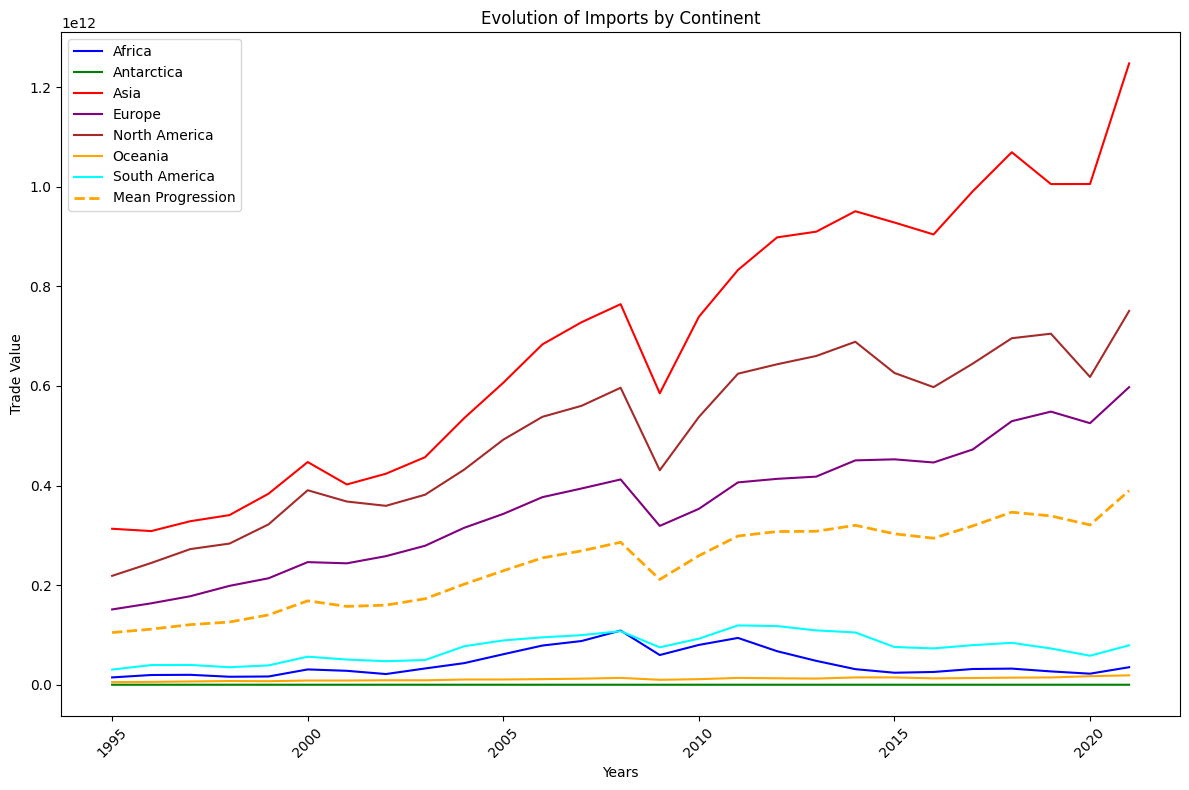

In [194]:
def grafica_exportaciones(df):
    years = df.columns[1:]
    colors = ['blue', 'green', 'red', 'purple', 'brown','orange','cyan']

    plt.figure(figsize=(12, 8))

    for i, row in df.iterrows():
        Continent = row['Continent']
        values = row[1:]  
        plt.plot(years, values, label=Continent, color=colors[i % len(colors)])

    mean_progression = df.iloc[:, 1:].mean(axis=0)
        
    plt.plot(years, mean_progression, label='Mean Progression', linestyle='--', linewidth=2, color='orange')
    plt.title('Evolution of Imports by Continent')
    plt.xlabel('Years')
    plt.ylabel('Trade Value')
    plt.legend()
    plt.xticks(rotation=45)  

    plt.tight_layout()
    return plt.show()
grafica_exportaciones(l)

In [195]:
def calcular_peso_relativo(df):
    # Pivote del DataFrame para obtener las exportaciones por año y ProductCode
    pivot_df = df.pivot_table(index='Continent', columns='Year', values='Trade Value', aggfunc='sum', fill_value=0)
    
    # Calcular la suma total de exportaciones por año
    total_por_ano = pivot_df.sum(axis=0)
    
    # Calcular el peso relativo en porcentaje
    peso_relativo_df = (pivot_df.div(total_por_ano, axis=1)) * 100
    
    return peso_relativo_df
rl = calcular_peso_relativo(lim).reset_index()
cl=['Antarctica']
rl = rl[~rl['Continent'].isin(cl)]

### Países

In [196]:
l = exports.merge(imports,on=['Country','Year'])

l['Diferencia'] = l['Trade Value_x'] - l['Trade Value_y']
l.columns
lw= ['Continent_x', 'Continent ID_x', 'Country ID_x', 'ISO 3_x','Continent_y', 'Continent ID_y',
       'Country ID_y', 'ISO 3_y', 'Trade Value_y']
l = l.drop(lw,axis=1)
l.sort_values(by='Diferencia', ascending = True)
l.head()
l = l.pivot_table(index = 'Country', columns= 'Year', values= 'Diferencia',aggfunc= 'sum',fill_value=0).reset_index()
l =l.sort_values(by=2021, ascending= True)
l.head(10)
l['TV1995-2021'] = (abs(l[2021]-l[1995])/l[1995])*100
#l.sort_values(by='TV1995-2021', ascending= True)
l.head(10)
col=[ 1995,          1996,          1997,
                1998,          1999,          2000,          2001,
                2002,          2003,          2004,          2005,
                2006,          2007,          2008,          2009,
                2010,          2011,          2012,          2013,
                2014,          2015,          2016,          2017,
                2018,          2019,          2020,          2021]
l = l.drop(col,axis=1)
l.head(10)

Year,Country,TV1995-2021
43,China,-1450.06
128,Mexico,-527.39
37,Canada,-244.75
218,Vietnam,179728.52
79,Germany,-419.90
102,Japan,-6.50
98,Ireland,11087.05
100,Italy,-440.20
44,Chinese Taipei,-241.35
199,Thailand,-626.11


#### gráfica de barras

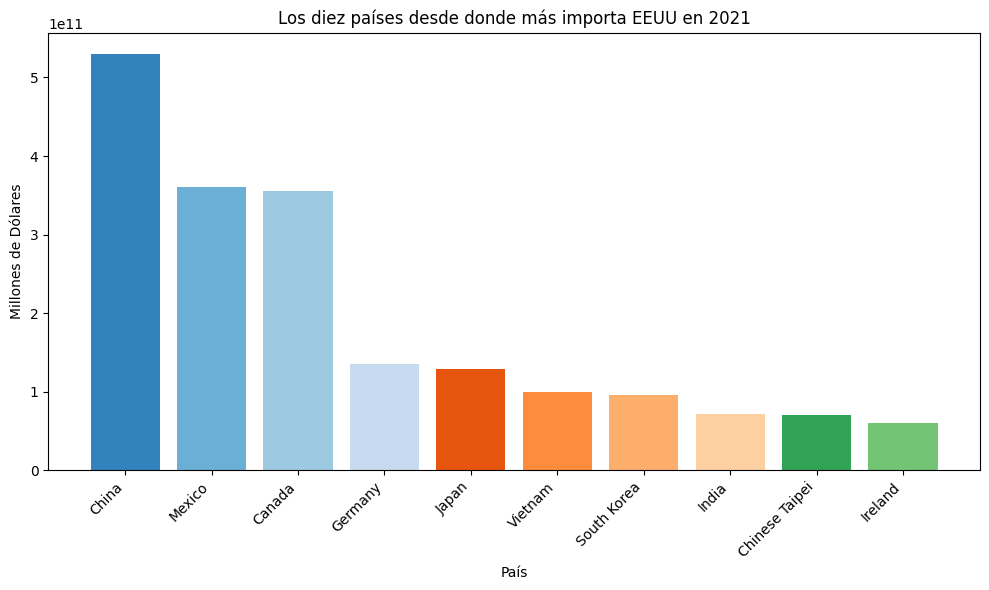

In [197]:
col=['Continent','Continent ID', 'Country ID', 'ISO 3',
       ]
lim = imports.drop(col, axis=1)
pivot_df = lim.pivot_table(index='Country', columns='Year', values='Trade Value', aggfunc='sum', fill_value=0)

l = pivot_df.reset_index()
best95=l.sort_values(by =2021, ascending=False)
best95
cl =[1995,1996,        1997,        1998,
              1999,        2000,        2001,        2002,        2003,
              2004,        2005,        2006,        2007,        2008,
              2009,        2010,        2011,        2012,        2013,
              2014,        2015,        2016,        2017,        2018,
              2019,        2020  
    
]
g =best95.drop(cl, axis =1 )
g['Normalización'] = g[2021]/max(best95[2021])
g = g.head(10)

plt.figure(figsize=(10, 6))
colors = plt.cm.tab20c.colors  

plt.bar(g['Country'], g[2021], color=colors)
plt.xlabel('País')
plt.ylabel('Millones de Dólares')
plt.title('Los diez países desde donde más importa EEUU en 2021')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()


plt.show()


#### Gráfica temporal

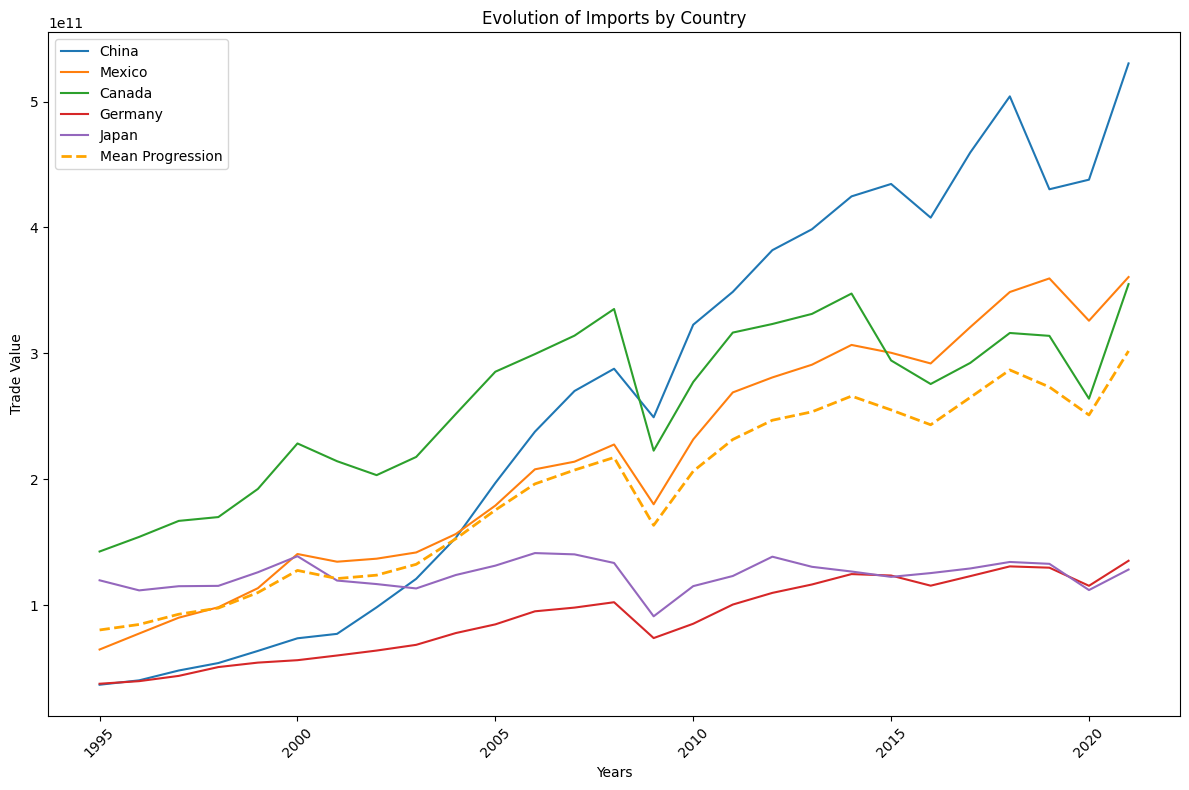

In [198]:
col=['Continent','Continent ID', 'Country ID', 'ISO 3',
       ]
lim = imports.drop(col, axis=1)
pivot_df = lim.pivot_table(index='Country', columns='Year', values='Trade Value', aggfunc='sum', fill_value=0)
ls = pivot_df.sort_values(by=2021, ascending= False).reset_index().head()
ls
###############################################################################################
def grafica_exportaciones(df):
    years = df.columns[1:]
    colors = plt.cm.tab10.colors 
   
    plt.figure(figsize=(12, 8))

    for i, row in df.iterrows():
        Country = row['Country']
        values = row[1:]  

        
        plt.plot(years, values, label=Country, color=colors[i % len(colors)])

    mean_progression = df.iloc[:, 1:].mean(axis=0)
        

    plt.plot(years, mean_progression, label='Mean Progression', linestyle='--', linewidth=2, color='orange')

       
  
    plt.title('Evolution of Imports by Country')
    plt.xlabel('Years')
    plt.ylabel('Trade Value')
    plt.legend()
    plt.xticks(rotation=45)  
    plt.tight_layout()
    return plt.show()
grafica_exportaciones(ls)


### 4. Balanza de sevicios

In [199]:
#ebopbs2002
ls= pd.read_csv("C:\\Users\\xabil\\OneDrive\\Escritorio\\eeuu\\Servicios EEUU\\2012-2021.csv")
#RefYear,CmdDesc,Cifvalue
ls.columns
lp= ['TypeCode', 'FreqCode', 'RefPeriodId', 'RefMonth', 'Period',
       'ReporterCode', 'ReporterISO', 'ReporterDesc', 'FlowCode', 'FlowDesc',
       'PartnerCode', 'PartnerISO', 'PartnerDesc', 'Partner2Code',
       'Partner2ISO', 'Partner2Desc', 'ClassificationCode',
       'ClassificationSearchCode', 'IsOriginalClassification', 'CmdCode', 'AggrLevel', 'IsLeaf', 'CustomsCode', 'CustomsDesc',
       'MosCode', 'MotCode', 'MotDesc', 'QtyUnitCode', 'QtyUnitAbbr', 'Qty',
       'IsQtyEstimated', 'AltQtyUnitCode', 'AltQtyUnitAbbr', 'AtlQty',
       'IsAltQtyEstimated', 'NetWgt', 'IsNetWgtEstimated', 'GrossWgt',
       'IsGrossWgtEstimated', 'Fobvalue', 'PrimaryValue',
       'LegacyEstimationFlag', 'IsReported', 'IsAggregate', 'Unnamed: 47']
bs =ls.drop(lp, axis=1)
bs = bs.sort_values('RefYear',ascending=True)
bs = bs.pivot_table(index='CmdDesc', columns='RefYear', values='Cifvalue', aggfunc='sum', fill_value=0).reset_index()
bs = bs.drop(2022,axis=1)
bs = bs.sort_values(2021,ascending=False)
bs = bs.head()



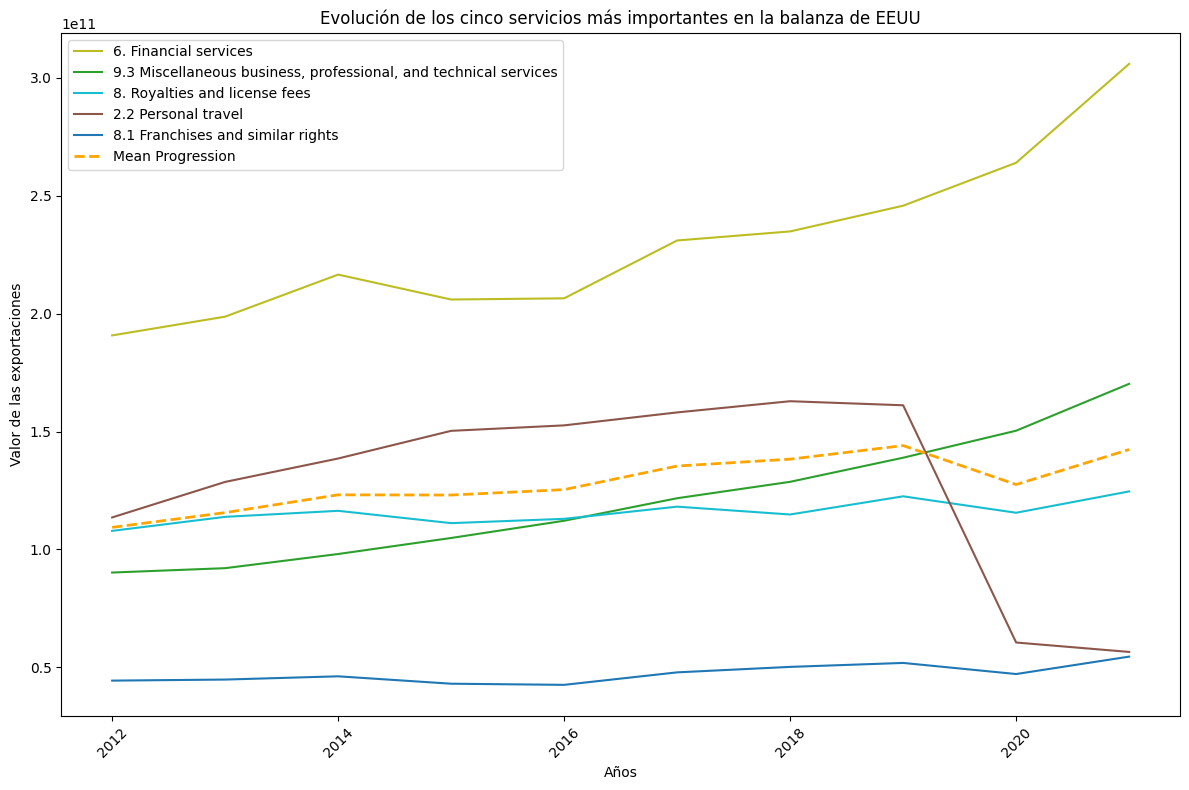

In [200]:
def grafica_exportaciones(df):
    years = df.columns[1:]
    colors = plt.cm.tab10.colors 

    plt.figure(figsize=(12, 8))
    for i, row in df.iterrows():
        Servicios = row['CmdDesc']
        values = row[1:]  
        plt.plot(years, values, label=Servicios, color=colors[i % len(colors)])

    mean_progression = df.iloc[:, 1:].mean(axis=0)
        
    
    plt.plot(years, mean_progression, label='Mean Progression', linestyle='--', linewidth=2, color='orange')
    plt.title('Evolución de los cinco servicios más importantes en la balanza de EEUU')
    plt.xlabel('Años')
    plt.ylabel('Valor de las exportaciones')
    plt.legend()
    plt.xticks(rotation=45)  
    plt.tight_layout()
    return plt.show()

grafica_exportaciones(bs)

### Another form

In [201]:
bs2=pd.read_csv(r"C:\Users\xabil\OneDrive\Escritorio\eeuu\DESGLOSE SERVICIOS.csv",sep=';')
indices_a_eliminar = list(range(0, 2)) + list(range(20, 31))
df = bs2.drop(bs2.index[indices_a_eliminar])
df = df.drop(df.index[15:20])
for columna in df.columns[1:]:
    # Reemplazar las comas por puntos en cada celda de la columna
    df[columna] = df[columna].str.replace(',', '.')



### Desglose PIB


In [202]:
lop=pd.read_excel(r"C:\Users\xabil\OneDrive\Escritorio\eeuu\PIB\pib extnew.xlsx")
lop
#Personal consumption expenditures
#Gross private domestic investment
#Net exports of goods and services
#Government consumption expenditures and gross investment
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None) 
# Obtener todos los valores únicos de la columna 'Unnamed: 0'
lop['Unnamed: 0'].unique()

lop

,Unnamed: 0,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Producto Interior Bruto (PIB),542.40,562.20,603.90,637.50,684.50,742.30,813.40,860.00,940.70,1017.60,1073.30,1164.90,1279.10,1425.40,1545.20,1684.90,1873.40,2081.80,2351.60,2627.30,2857.30,3207.00,3343.80,3634.00,4037.60,4339.00,4579.60,4855.20,5236.40,5641.60,5963.10,6158.10,6520.30,6858.60,7287.20,7639.70,8073.10,8577.60,9062.80,9631.20,10251.00,10581.90,10929.10,11456.50,12217.20,13039.20,13815.60,14474.20,14769.90,14478.10,15049.00,15599.70,16254.00,16880.70,17608.10,18295.00,18804.90,19612.10,20656.50,21521.40,21323.00,23594.00,25744.10,27360.90
1,Gastos de Consumo Personal,331.20,341.50,362.60,382.00,410.60,443.00,479.90,506.70,556.90,603.60,646.70,699.90,768.20,849.60,930.20,1030.50,1147.70,1274.00,1422.30,1585.40,1750.70,1934.00,2071.30,2281.60,2492.30,2712.80,2886.30,3076.30,3330.00,3576.80,3809.00,3943.40,4197.60,4452.00,4721.00,4962.60,5244.60,5536.80,5877.20,6283.80,6767.20,7073.80,7348.90,7740.70,8232.00,8769.10,9277.20,9746.60,10050.10,9891.20,10260.30,10698.90,11047.40,11388.20,11874.50,12297.40,12726.80,13290.60,13934.40,14417.60,14206.20,16043.00,17511.70,18570.60
2,Inversión Privada Bruta Nacional,86.50,86.60,97.00,103.30,112.20,129.60,144.20,142.70,156.90,173.60,170.00,196.80,228.10,266.90,274.50,257.30,323.20,396.60,478.40,539.70,530.10,631.20,581.00,637.50,820.10,829.70,849.10,892.20,937.00,999.70,993.40,944.30,1013.00,1106.80,1256.50,1317.50,1432.10,1595.60,1736.70,1887.10,2038.40,1934.80,1930.40,2027.10,2281.30,2534.70,2701.00,2673.00,2477.60,1929.70,2165.50,2332.60,2621.80,2838.30,3074.00,3288.50,3278.30,3467.70,3724.80,3892.40,3748.40,4216.30,4756.60,4843.90
3,Exportaciones Netas de Bienes y Servicios,4.20,4.90,4.10,4.90,6.90,5.60,3.90,3.60,1.40,1.40,3.90,0.60,-3.40,4.10,-0.80,16.00,-1.60,-23.10,-25.40,-22.50,-13.10,-12.50,-20.00,-51.60,-102.70,-114.00,-131.90,-144.80,-109.40,-86.70,-77.90,-28.60,-34.70,-65.20,-92.50,-89.80,-96.40,-102.00,-162.70,-259.60,-381.10,-376.70,-439.70,-522.00,-634.10,-739.90,-786.50,-735.90,-740.90,-419.20,-532.30,-579.60,-551.60,-478.50,-508.90,-524.30,-503.30,-543.30,-593.10,-578.50,-626.40,-858.20,-971.10,-798.70
4,Gastos de Consumo del Gobierno e Inversión Bruta,120.50,129.20,140.30,147.20,154.80,164.10,185.40,207.00,225.50,239.00,252.60,267.50,286.20,304.80,341.40,381.10,404.20,434.30,476.30,524.80,589.60,654.40,711.50,766.60,827.90,910.50,976.10,1031.50,1078.90,1151.90,1238.60,1299.00,1344.50,1364.90,1402.30,1449.40,1492.80,1547.10,1611.60,1719.90,1826.40,1950.00,2089.50,2210.60,2338.10,2475.30,2623.80,2790.60,2983.00,3076.30,3155.60,3147.90,3136.50,3132.60,3168.60,3233.40,3303.00,3397.10,3590.40,3789.90,3994.80,4193.10,4446.80,4745.10


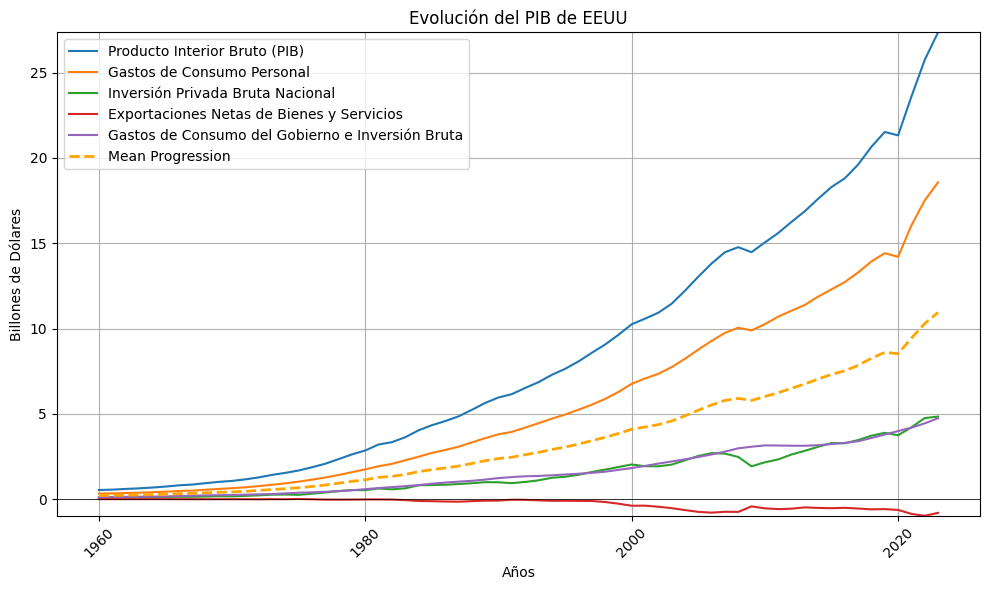

In [203]:

def grafica_exportaciones(df):
    years = df.columns[1:]
    colors = plt.cm.tab10.colors 
    plt.figure(figsize=(10, 6))
    for i, row in df.iterrows():
        PIB = row['Unnamed: 0']
        values = row[1:]  
        values = pd.to_numeric(values)
        plt.plot(years, values, label=PIB, color=colors[i % len(colors)])

   
    mean_progression = df.iloc[:, 1:].mean(axis=0)
    plt.plot(years, mean_progression, label='Mean Progression', linestyle='--', linewidth=2, color='orange')
    ymin = df.iloc[:, 1:].values.min()  
    ymax = df.iloc[:, 1:].values.max()  
    plt.ylim(ymin, ymax)  

   
    plt.title('Evolución del PIB de EEUU')
    plt.xlabel('Años')
    plt.ylabel('Billones de Dólares')
    plt.legend()

    
    plt.xticks(years[::20], rotation=45)  
    plt.ticklabel_format(axis='y', style='plain')  
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.0f}".format(x/1000)))  
    plt.tight_layout()
    plt.grid(True)  
    plt.axhline(0, color='black', linewidth=0.5)  
    plt.show()


grafica_exportaciones(lop)


In [204]:
yearly_totals = lop.iloc[:, 1:].sum()  # Excluye la primera columna 'Unnamed: 0'

# Calcular el peso relativo de cada columna por año
# Dividir cada valor en 'lop' por el total correspondiente en 'yearly_totals'
relative_weights = lop.iloc[:, 1:].divide(yearly_totals, axis=1)*100

# Agregar la columna 'Unnamed: 0' de nuevo al DataFrame 'relative_weights'
relative_weights.insert(0, 'Unnamed: 0', lop['Unnamed: 0'])

In [205]:
#relative_weights

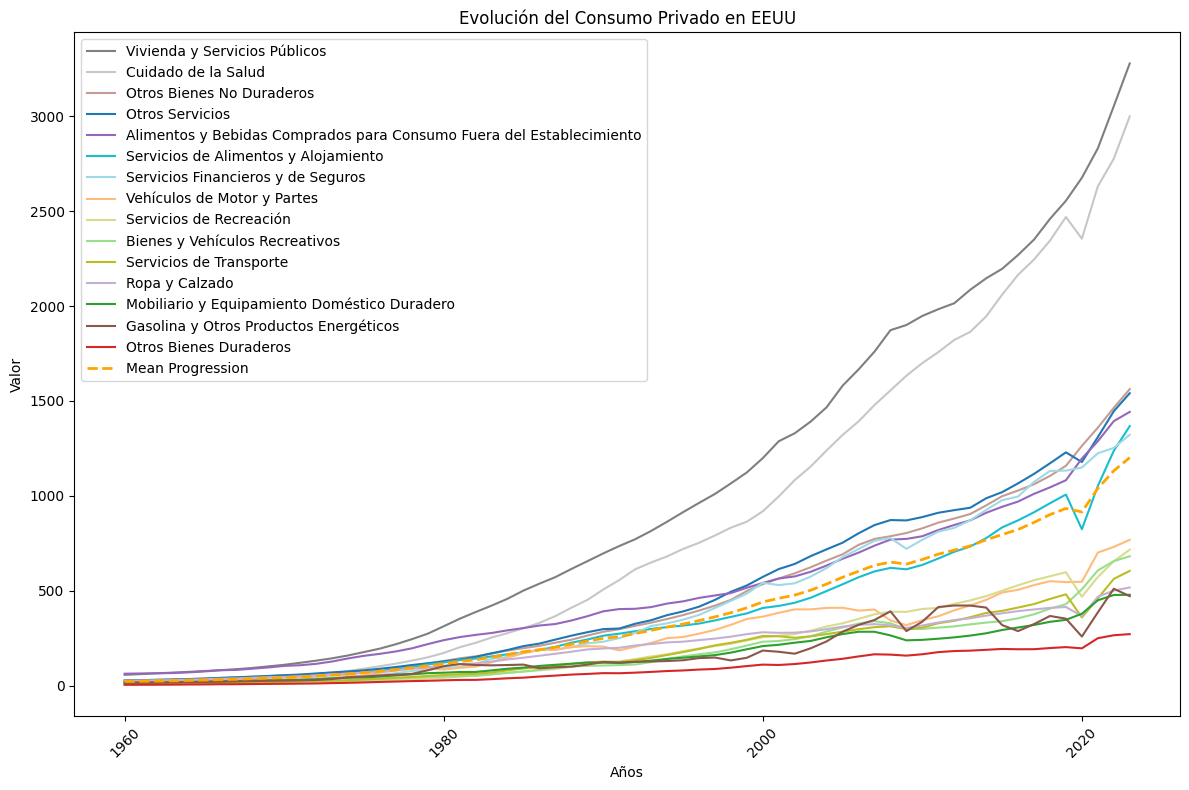

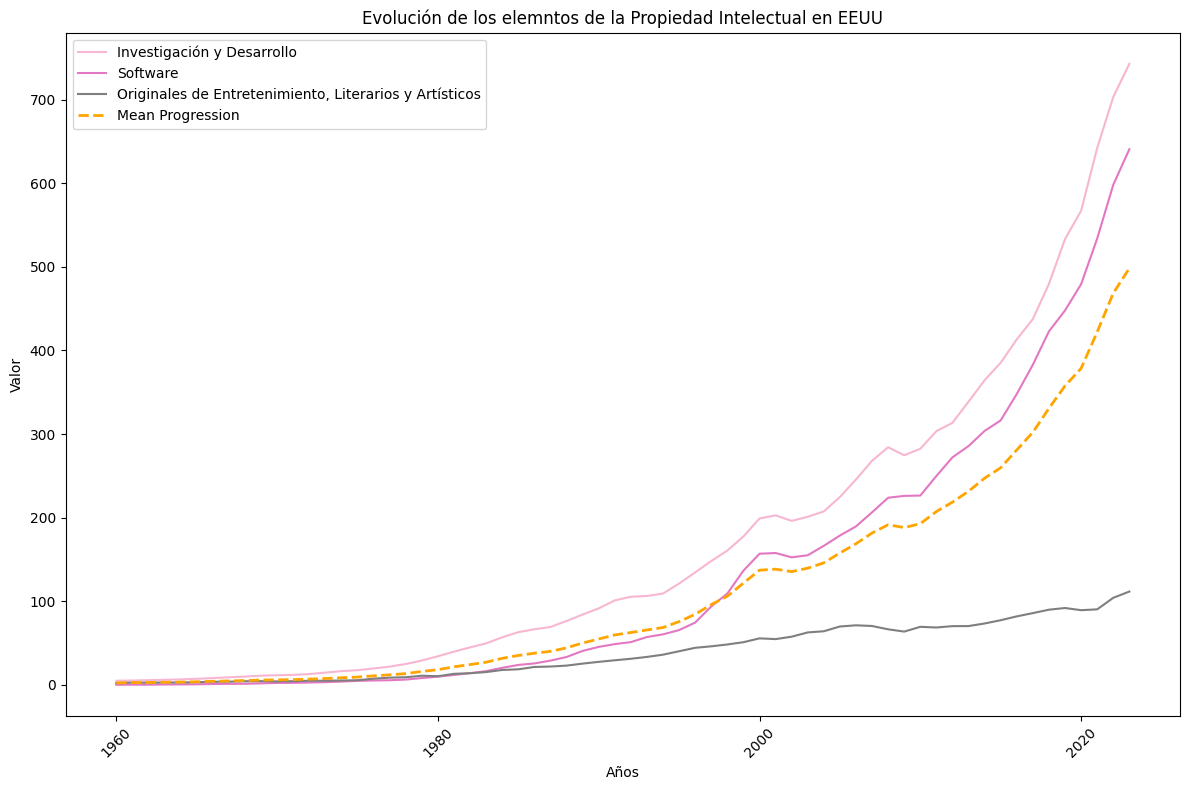

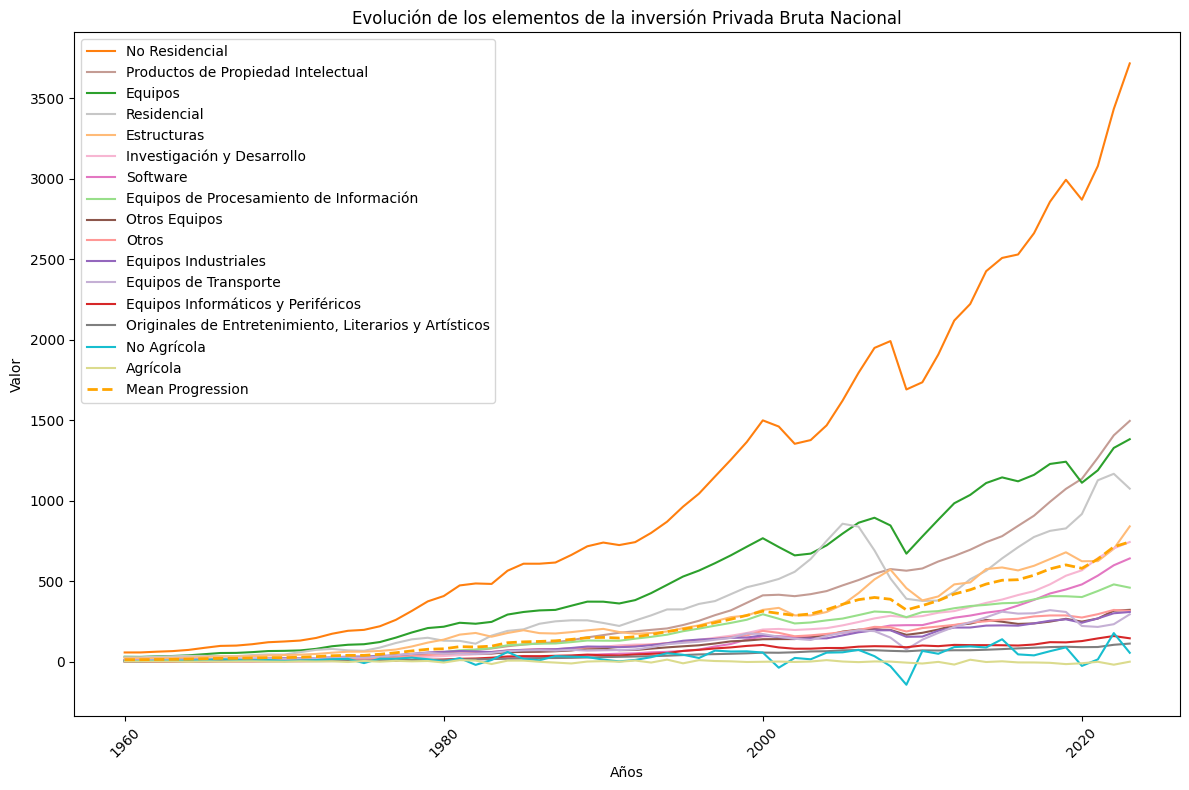

array(['No Residencial', 'Productos de Propiedad Intelectual', 'Equipos',
       'Residencial', 'Estructuras', 'Investigación y Desarrollo',
       'Software', 'Equipos de Procesamiento de Información',
       'Otros Equipos', 'Otros', 'Equipos Industriales',
       'Equipos de Transporte', 'Equipos Informáticos y Periféricos',
       'Originales de Entretenimiento, Literarios y Artísticos',
       'No Agrícola', 'Agrícola'], dtype=object)

In [211]:
netexprgns= pd.read_excel(r"C:\Users\xabil\OneDrive\Escritorio\eeuu\PIB\pib extnew.xlsx", sheet_name='Exportaciones Netas de Bienes y')


# Lista de valores que queremos filtrar


# Filtrar filas que no contienen los valores en la lista `cl`
filtered_df = netexprgns[~netexprgns['Unnamed: 0'].isin(cl)]

# Renombrar el valor 'Goods' a 'Servicios' en la columna 'Unnamed: 0'
#filtered_df.loc[filtered_df['Unnamed: 0'] == '        Goods', 'Unnamed: 0'] = 'Servicios'
#filtered_df 

#### Gastos de consumo personal.
personalconsup= pd.read_excel(r"C:\Users\xabil\OneDrive\Escritorio\eeuu\PIB\pib extnew.xlsx", sheet_name='Gastos de Consumo Personal')
personalconsup['Unnamed: 0'].unique()

# Bienes duraderos y no duraderos,servicios.

cl= ['Gastos de Consumo Personal', 'Bienes', 'Bienes Duraderos',
       'Bienes No Duraderos','Servicios', 'Produto interior bruto',
       'Gastos Finales de Consumo de Instituciones sin Fines de Lucro que Sirven a los Hogares (ISFLAH)',
       'Producción Bruta de Instituciones sin Fines de Lucro',
       'Menos: Ingresos por Ventas de Bienes y Servicios de Instituciones sin Fines de Lucro','Gastos de Consumo de los Hogares (por Servicios)'
       ]
personalconsup =personalconsup[~personalconsup['Unnamed: 0'].isin(cl)]
personalconsup=personalconsup.sort_values(by='2023', ascending= False)

def grafica_exportacionespc(df):
    years = df.columns[1:]
    colors = plt.cm.tab20.colors 
    plt.figure(figsize=(12, 8))
    for i, row in df.iterrows():
        PIB = row['Unnamed: 0']
        values = row[1:] 
        
        plt.plot(years, values, label=PIB, color=colors[i % len(colors)])

    mean_progression = df.iloc[:, 1:].mean(axis=0)

    plt.plot(years, mean_progression, label='Mean Progression', linestyle='--', linewidth=2, color='orange')

    plt.title('Evolución del Consumo Privado en EEUU')
    plt.xlabel('Años')
    plt.ylabel('Valor')
    plt.legend()
    plt.xticks(years[::20], rotation=45)  

    plt.tight_layout()
    return plt.show()

grafica_exportacionespc(personalconsup)


# tasas de variación con el consumo privado.
personalconsup['TV2022-2023'] = ((personalconsup['2023'] - personalconsup['2022'])/personalconsup['2022'])*100
personalconsuptv=personalconsup.sort_values(by='TV2022-2023',ascending= False)

lol=[ '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023']
personalconsuptv.drop(lol,axis=1)



##############################################
##### Inversión privada bruta nacional.

innvprbrnacionalraw= pd.read_excel(r"C:\Users\xabil\OneDrive\Escritorio\eeuu\PIB\pib extnew.xlsx", sheet_name='Inversión Privada Bruta Naciona')
innvprbrnacionalraw['Unnamed: 0'].unique()
cl2=['Inversión Privada Bruta Nacional','Inversión Fija','Produto interior bruto','Cambio en Inventarios Privados']
innvprbrnacional=innvprbrnacionalraw[~innvprbrnacionalraw['Unnamed: 0'].isin(cl2)]
#grafica_exportaciones(innvprbrnacional)
innvprbrnacional= innvprbrnacional.sort_values(by='2023', ascending= False)

# Tratamiento de Datos.
innvprbrnacional['Unnamed: 0'].unique()
cl3=['No Residencial','Equipos',
       'Residencial', 'Estructuras','Productos de Propiedad Intelectual', 'Otros', 'Equipos Informáticos y Periféricos','Equipos de Procesamiento de Información', 'Otros Equipos',
       'Equipos Industriales', 'Equipos de Transporte',
       'No Agrícola', 'Agrícola']
propiedadintelectual=innvprbrnacional[~innvprbrnacional['Unnamed: 0'].isin(cl3)]


def grafica_exportacionespi(df):
    years = df.columns[1:]
    colors = plt.cm.tab20.colors 

    plt.figure(figsize=(12, 8))
    for i, row in df.iterrows():
        PIB = row['Unnamed: 0']
        values = row[1:]  
        plt.plot(years, values, label=PIB, color=colors[i % len(colors)])

    mean_progression = df.iloc[:, 1:].mean(axis=0)
    plt.plot(years, mean_progression, label='Mean Progression', linestyle='--', linewidth=2, color='orange')

       
    
    plt.title('Evolución de los elemntos de la Propiedad Intelectual en EEUU')
    plt.xlabel('Años')
    plt.ylabel('Valor')
    plt.legend()
    plt.xticks(years[::20], rotation=45) 

    plt.tight_layout()
    return plt.show()
grafica_exportacionespi(propiedadintelectual)


# Gráfica de la inversión privada bruta nacional
innvprbrnacionalraw['Unnamed: 0'].unique()
cl2=['Inversión Privada Bruta Nacional','Inversión Fija','Produto interior bruto','Cambio en Inventarios Privados']
innvprbrnacional=innvprbrnacional[~innvprbrnacional['Unnamed: 0'].isin(cl2)]
#grafica_exportaciones(innvprbrnacional)
innvprbrnacional= innvprbrnacional.sort_values(by='2023', ascending= False)

# función 
def grafica_exportacionesipb(df):
    
    years = df.columns[1:]
    colors = plt.cm.tab20.colors 

    
    plt.figure(figsize=(12, 8))

    for i, row in df.iterrows():
        PIB = row['Unnamed: 0']
        values = row[1:]  

        plt.plot(years, values, label=PIB, color=colors[i % len(colors)])

    mean_progression = df.iloc[:, 1:].mean(axis=0)
    
    plt.plot(years, mean_progression, label='Mean Progression', linestyle='--', linewidth=2, color='orange')

       
    plt.title('Evolución de los elementos de la inversión Privada Bruta Nacional')
    plt.xlabel('Años')
    plt.ylabel('Valor')
    plt.legend()
    plt.xticks(years[::20], rotation=45) 

    plt.tight_layout()
    return plt.show()
grafica_exportacionesipb(innvprbrnacional)


# Gasto de consumo del gobierno.

gastoconsumogov= pd.read_excel(r"C:\Users\xabil\OneDrive\Escritorio\eeuu\PIB\pib extnew.xlsx", sheet_name='Gastos de Consumo del Gobierno ')
gastoconsumogov['Unnamed: 0'].unique()
cl4=['Gastos de Consumo del Gobierno e Inversión Bruta','Produto interior bruto']
gastoconsumogov= gastoconsumogov[~gastoconsumogov['Unnamed: 0'].isin(cl4)]
gastoconsumogov
innvprbrnacional['Unnamed: 0'].unique()

